# An anlysis of the characteristics of the most thrombolysable patient at each hopsital

XGBoost models were trained on stratified k-fold cross-validation data. The 10 features in the model are:

* Arrival-to-scan time: Time from arrival at hospital to scan (mins)
* Infarction: Stroke type (1 = infarction, 0 = haemorrhage)
* Stroke severity: Stroke severity (NIHSS) on arrival
* Precise onset time: Onset time type (1 = precise, 0 = best estimate)
* Prior disability level: Disability level (modified Rankin Scale) before stroke
* Stroke team: Stroke team attended
* Use of AF anticoagulents: Use of atrial fibrillation anticoagulant (1 = Yes, 0 = No)
* Onset-to-arrival time: Time from onset of stroke to arrival at hospital (mins)
* Onset during sleep: Did stroke occur in sleep?
* Age: Age (as middle of 5 year age bands)

Predictions are taken from each of the test sets in the k-fold validation.

Here we compare the feature values for:

* The most thrombolysable patient at each hospital (the patient with the highest predicted proability of thrombolysis)
* All patients
* All patients receiving thrombolysis
* All patients not receiving thrombolysis

Comapred with the other groups, the most thrombolysable patients ....

* Have shorter arrrival-to-scan times
* Have an infarction stroke type
* Have stroke servities with NIHR 5-25
* Have a precise onset time
* Have lower pre-stroke disability
* Are not taking anticoagulant medication
* Have shorter onset-to-arrival times
* Do not have onset during sleep
* Are younger

## Import packages

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import data

Predictions were previous saved from Notebook 02

In [2]:
data = pd.read_csv('./predictions/02_xgb_10_features_combined_test_features.csv')
features = list(data)
features.remove('Thrombolysis'); features.remove('Stroke team'); 
predictions = pd.read_csv('./predictions/02_xgb_10_features_predictions.csv')

In [3]:
data.head()

,Arrival-to-scan time,Infarction,Stroke severity,Precise onset time,Prior disability level,Stroke team,Use of AF anticoagulants,Onset-to-arrival time,Onset during sleep,Age,Thrombolysis
0,17.0,1,14.0,1,0,TXHRP7672C,0,186.0,0,47.5,1
1,25.0,1,6.0,1,0,SQGXB9559U,0,71.0,0,52.5,1
2,138.0,1,2.0,1,0,LFPMM4706C,0,67.0,0,42.5,0
3,21.0,0,11.0,1,0,MHMYL4920B,0,86.0,0,77.5,0
4,8.0,1,16.0,1,0,EQZZZ5658G,0,83.0,0,77.5,1


In [4]:
predictions.head()

,hospital,observed,prob,predicted,k_fold,correct
0,TXHRP7672C,1.0,0.957469,1.0,0,True
1,SQGXB9559U,1.0,0.560687,1.0,0,True
2,LFPMM4706C,0.0,0.026418,0.0,0,True
3,MHMYL4920B,0.0,0.000148,0.0,0,True
4,EQZZZ5658G,1.0,0.907736,1.0,0,True


In [5]:
combined_data = pd.concat([data, predictions], axis=1)
combined_data.drop(['observed', 'hospital'], axis=1, inplace=True)
combined_data.head()

,Arrival-to-scan time,Infarction,Stroke severity,Precise onset time,Prior disability level,Stroke team,Use of AF anticoagulants,Onset-to-arrival time,Onset during sleep,Age,Thrombolysis,prob,predicted,k_fold,correct
0,17.0,1,14.0,1,0,TXHRP7672C,0,186.0,0,47.5,1,0.957469,1.0,0,True
1,25.0,1,6.0,1,0,SQGXB9559U,0,71.0,0,52.5,1,0.560687,1.0,0,True
2,138.0,1,2.0,1,0,LFPMM4706C,0,67.0,0,42.5,0,0.026418,0.0,0,True
3,21.0,0,11.0,1,0,MHMYL4920B,0,86.0,0,77.5,0,0.000148,0.0,0,True
4,8.0,1,16.0,1,0,EQZZZ5658G,0,83.0,0,77.5,1,0.907736,1.0,0,True


## Get most thrombolsyable patient at each hospital

In [6]:
# Set up list for most thrombolsyable patient at each hospital
most_thrombolysable_patients = []

# Create groupby object
grouped = combined_data.groupby('Stroke team')

# Loop through each hopsital
for hospital, hospital_data in grouped:
    sorted = hospital_data.sort_values('prob', ascending=False)
    most_thrombolysable_patients.append( sorted.iloc[0])

# Convert to dataframe and save
most_thrombolysable_patients = pd.DataFrame(most_thrombolysable_patients)
most_thrombolysable_patients.to_csv('./predictions/02a_most_thrombolsyable_patients', index_label='idx')

most_thrombolysable_patients.head()

,Arrival-to-scan time,Infarction,Stroke severity,Precise onset time,Prior disability level,Stroke team,Use of AF anticoagulants,Onset-to-arrival time,Onset during sleep,Age,Thrombolysis,prob,predicted,k_fold,correct
79658,10.0,1,21.0,1,1,AGNOF1041H,0,10.0,0,87.5,1,0.976182,1.0,4,True
37705,7.0,1,19.0,1,1,AKCGO9726K,0,39.0,0,47.5,1,0.960032,1.0,2,True
75222,10.0,1,20.0,1,0,AOBTM3098N,0,57.0,0,67.5,0,0.902480,1.0,4,False
83458,24.0,1,12.0,1,0,APXEE8191H,0,6.0,0,67.5,1,0.963226,1.0,4,True
57062,16.0,1,13.0,1,0,ATDID5461S,0,35.0,0,57.5,1,0.921572,1.0,3,True


## How many of the most thrombolsyable patients were thrombolysed?

In [7]:
result = most_thrombolysable_patients['prob'].mean()
print(f'Expected proportion thrombolysed = {result:0.3f}')

result = most_thrombolysable_patients['correct'].mean()
print(f'Observed proportion thrombolysed = {result:0.3f}')

Expected proportion thrombolysed = 0.955
Observed proportion thrombolysed = 0.894


## Compare feature values

Here we compare the feature values for:

* The most thrombolysable patient at each hospital (the patient with the highest predicted proability of thrombolysis)
* All patients
* All patients receiving thrombolysis
* All patients not receiving thrombolysis

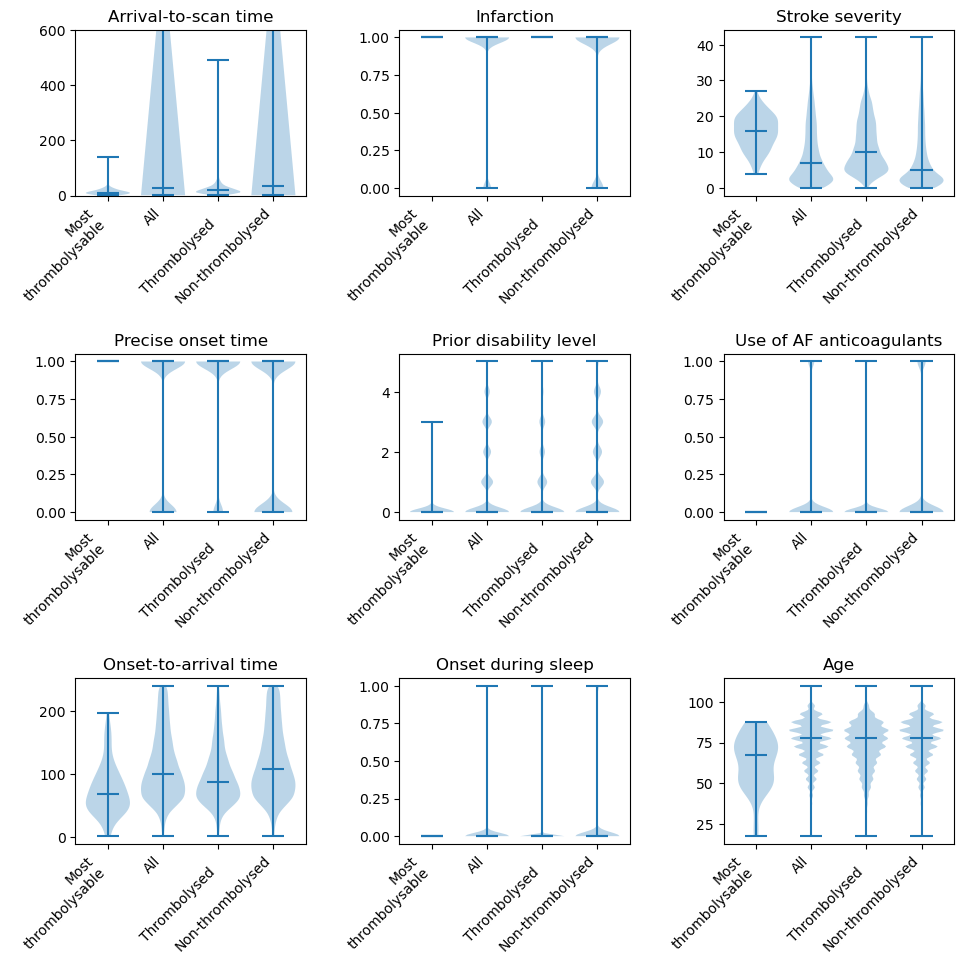

In [56]:
fig = plt.figure(figsize=(10,10))


for idx, feature in enumerate(features):
    ax = fig.add_subplot(3,3,idx+1)

    # Get feature values
    most_thrombolysable = most_thrombolysable_patients[feature]
    all_patients = combined_data[feature]
    mask = combined_data['Thrombolysis'] == 1
    thrombolysed_patients = combined_data[mask][feature]
    mask = combined_data['Thrombolysis'] == 0
    non_thrombolysed_patients = combined_data[mask][feature]

    # Plot violin plot
    data_set = [
        most_thrombolysable, all_patients, thrombolysed_patients, non_thrombolysed_patients]

    ax.violinplot(data_set,widths=0.8, showmedians=True)
    if feature == 'Arrival-to-scan time':
        ax.set_ylim(0, 600)

    # Add labels
    ax.set_title(feature)
    labels = ['Most\nthrombolysable', 'All', '\nThrombolysed', 'Non-thrombolysed']
    ax.set_xticks(np.arange(1, len(labels)+1))
    ax.set_xticklabels(labels, rotation=45, verticalalignment='top', horizontalalignment='right')


plt.tight_layout(pad=2)

plt.savefig('./output/02a_most_thrombolsyable_violin.jpg', dpi=300)
plt.show()